In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data=pd.read_csv(r"./mnist_train.csv")
test_data=pd.read_csv(r"./mnist_test.csv")

train_data=train_data.to_numpy()    # train_data shape: (60000, 785)
m, n = train_data.shape
test_data=test_data.to_numpy()      # test_data shape: (10000, 785)

X_train=train_data[:,1:]            # X_train shape: (60000, 784)
y_train=train_data[:,0]             # y_train shape: (60000,)
X_test=test_data[:,1:]              # X_test shape: (10000, 784)
y_test=test_data[:,0]               # y_test shape: (10000,)

X_train = X_train / 255.0           # Normalizing the data
X_test = X_test / 255.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Training SVM Classifiers for each digit...\n")

sample_size = 10000
indices = np.random.choice(m, sample_size, replace=False)
X_train_sampled = X_train[indices]
y_train_sampled = y_train[indices]

classifiers = {}
y_pred_binary = {}
precisions = {}
recalls = {}
f1_scores = {}

for digit in range(10):
  print(f"Training classifier for digit {digit}...")

  y_train_binary = (y_train_sampled == digit).astype(int)

  svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
  svm.fit(X_train_sampled, y_train_binary)

  classifiers[digit] = svm

  y_test_binary = (y_test == digit).astype(int)
  y_pred_binary[digit] = svm.predict(X_test)

  precisions[digit] = precision_score(y_test_binary, y_pred_binary[digit])
  recalls[digit] = recall_score(y_test_binary, y_pred_binary[digit])
  f1_scores[digit] = f1_score(y_test_binary, y_pred_binary[digit])

  print(f"Classifier for digit {digit} trained successfully.")

Training SVM Classifiers for each digit...

Training classifier for digit 0...
Classifier for digit 0 trained successfully.
Training classifier for digit 1...
Classifier for digit 1 trained successfully.
Training classifier for digit 2...
Classifier for digit 2 trained successfully.
Training classifier for digit 3...
Classifier for digit 3 trained successfully.
Training classifier for digit 4...
Classifier for digit 4 trained successfully.
Training classifier for digit 5...
Classifier for digit 5 trained successfully.
Training classifier for digit 6...
Classifier for digit 6 trained successfully.
Training classifier for digit 7...
Classifier for digit 7 trained successfully.
Training classifier for digit 8...
Classifier for digit 8 trained successfully.
Training classifier for digit 9...
Classifier for digit 9 trained successfully.


In [ ]:
print("\n--- Evaluation Results ---")
print(f"{'Digit':<10}{'Precision':<15}{'Recall':<15}{'F1-Score':<15}")
print("-" * 50)

for digit in range(10):
    print(f"{digit:<10}{precisions[digit]:<15.4f}{recalls[digit]:<15.4f}{f1_scores[digit]:<15.4f}")

# Find the most difficult digits to classify
f1_scores_list = list(f1_scores.items())
f1_scores_list.sort(key=lambda x: x[1])
print("\nDigits ranked by difficulty (based on F1-score, lowest to highest):")
for digit, score in f1_scores_list:
    print(f"Digit {digit}: F1-score = {score:.4f}")

# Calculate overall model performance
y_pred_multi = np.argmax([classifiers[i].predict_proba(X_test)[:, 1] for i in range(10)], axis=0)
overall_precision = precision_score(y_test, y_pred_multi, average='macro')
overall_recall = recall_score(y_test, y_pred_multi, average='macro')
overall_f1 = f1_score(y_test, y_pred_multi, average='macro')

print("\n--- Overall Model Performance ---")
print(f"Precision: {overall_precision:.4f}")
print(f"Recall: {overall_recall:.4f}")
print(f"F1-Score: {overall_f1:.4f}")


--- Evaluation Results ---
Digit     Precision      Recall         F1-Score       
--------------------------------------------------
0         0.9856         0.9796         0.9826         
1         0.9902         0.9841         0.9872         
2         0.9865         0.9215         0.9529         
3         0.9822         0.9307         0.9558         
4         0.9784         0.9226         0.9497         
5         0.9829         0.9025         0.9410         
6         0.9807         0.9541         0.9672         
7         0.9712         0.9193         0.9445         
8         0.9749         0.8758         0.9227         
9         0.9536         0.8969         0.9244         

Digits ranked by difficulty (based on F1-score, lowest to highest):
Digit 8: F1-score = 0.9227
Digit 9: F1-score = 0.9244
Digit 5: F1-score = 0.9410
Digit 7: F1-score = 0.9445
Digit 4: F1-score = 0.9497
Digit 2: F1-score = 0.9529
Digit 3: F1-score = 0.9558
Digit 6: F1-score = 0.9672
Digit 0: F1-score = 

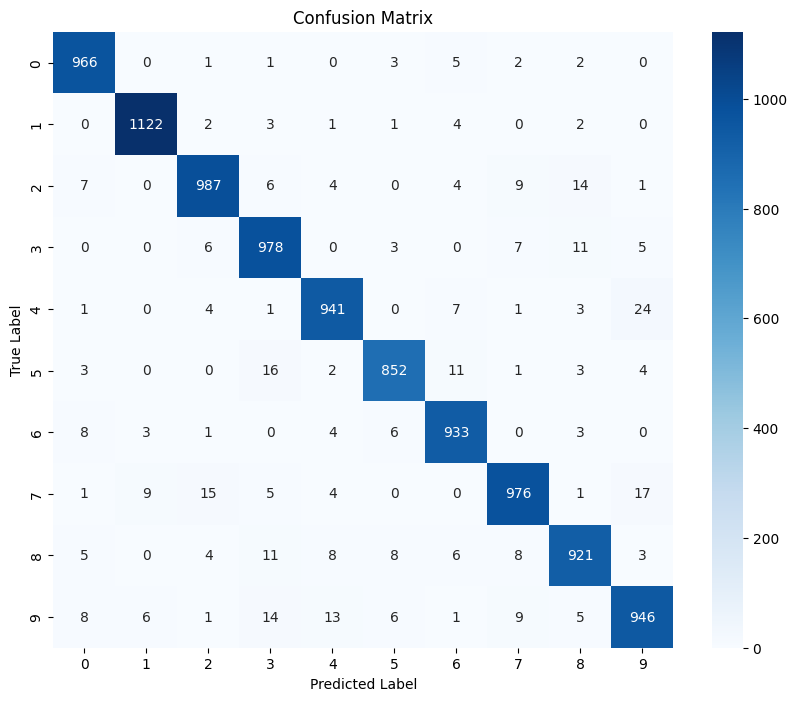

In [ ]:
cm = confusion_matrix(y_test, y_pred_multi)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1200x600 with 0 Axes>

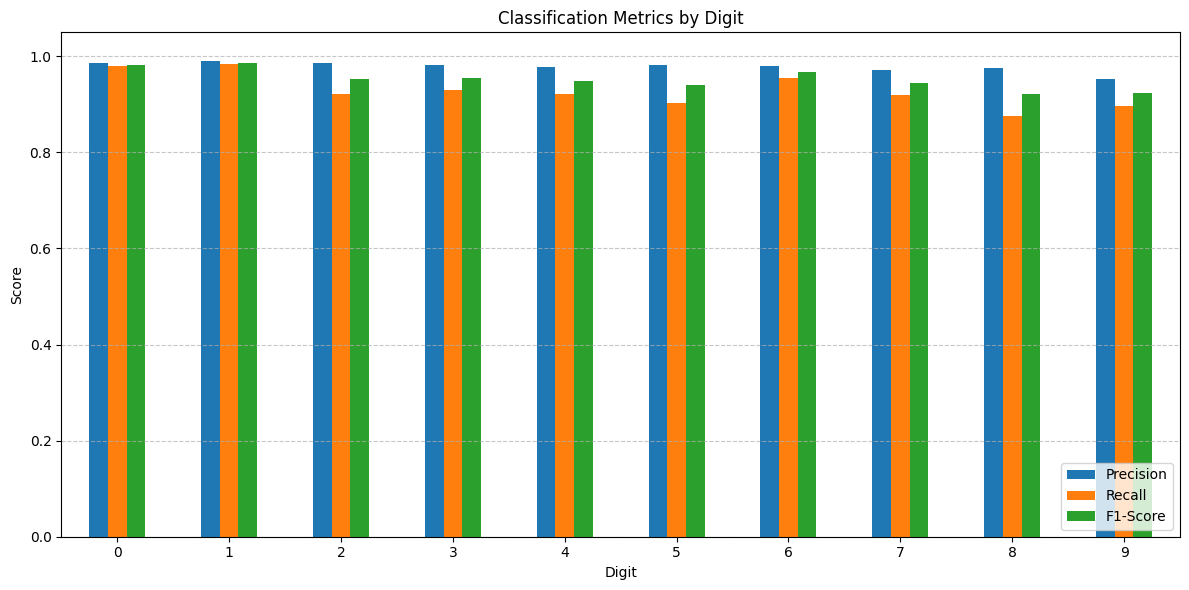

In [ ]:
metrics_df = pd.DataFrame({
    'Digit': range(10),
    'Precision': [precisions[i] for i in range(10)],
    'Recall': [recalls[i] for i in range(10)],
    'F1-Score': [f1_scores[i] for i in range(10)]
})

plt.figure(figsize=(12, 6))
metrics_df.set_index('Digit').plot(kind='bar', figsize=(12, 6))
plt.title('Classification Metrics by Digit')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
